# Convolution Neural Network (CNN)

- This notebooks contains two custom CCN models trained on CIFAR10 Dataset.
-

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab-Notebooks/project-cifar10')

## Load Dependencies





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report

from utils.plots import Plot

## Initial Setup

In [3]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime
now = datetime.now()  # get current datetime object
formatted_date_now = now.strftime("%d-%m-%y")
formatted_time_now = now.strftime("%H:%M:%S")

def get_callbacks():
    # Define early stop on 'val_loss' to stop the process.
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    # Define reduce LR
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-4, verbose=1)
    return early_stop, reduce_lr

## Load Dataset

In [4]:
from keras.datasets import cifar10

def load_dataset():
    try:
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()
        return X_train, y_train, X_test, y_test
    except Exception as e:
        raise ValueError(f"Dataset could not be loaded: {e}")

# CALL the function
X_train, y_train, X_test, y_test = load_dataset()

# Check the Shapes
print("\n")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)




X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### Define Classes

In [5]:
# Define the classes
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
# Print the first class label and name from y_train dataset
print(f"{y_train[0]} : {class_names[y_train[0][0]]}")

# Print the last class label and name from y_train dataset
print(f"{y_train[10000]} : {class_names[y_train[10000][0]]}")

[6] : frog
[1] : automobile


In [7]:
from numpy._core.defchararray import count

# Check the uniques class label in the dataset
# Set return_counts = True
# This return the value count for each class
unique_classes, counts = np.unique(y_train, return_counts=True)

print("Unique Classes:", unique_classes)
print("Classes Names:", class_names)
print("Total Unique Classes:", len(unique_classes))

for i in range(len(unique_classes)):
    print(f"{class_names[i]}: {counts[i]}")



Unique Classes: [0 1 2 3 4 5 6 7 8 9]
Classes Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Total Unique Classes: 10
airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [8]:
from keras.src.random import randint
for _ in range(5):
    idx = np.random.randint(0, len(y_train))
    label = y_train[idx][0]
    print("Class label:", label)
    print("Class name :", class_names[label])
    print("-----")

Class label: 1
Class name : automobile
-----
Class label: 8
Class name : ship
-----
Class label: 9
Class name : truck
-----
Class label: 7
Class name : horse
-----
Class label: 4
Class name : deer
-----


### Class Distribution

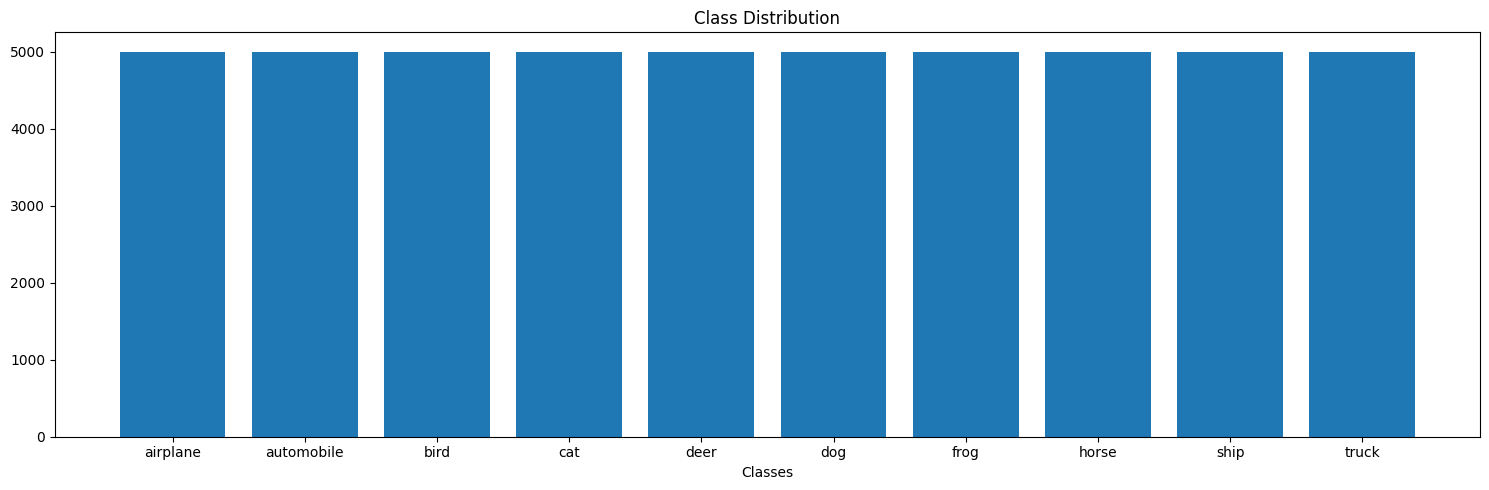

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(class_names, counts)
plt.title("Class Distribution", fontsize=12)
plt.xlabel("Classes", fontsize=10)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## **Data Visualization**


---



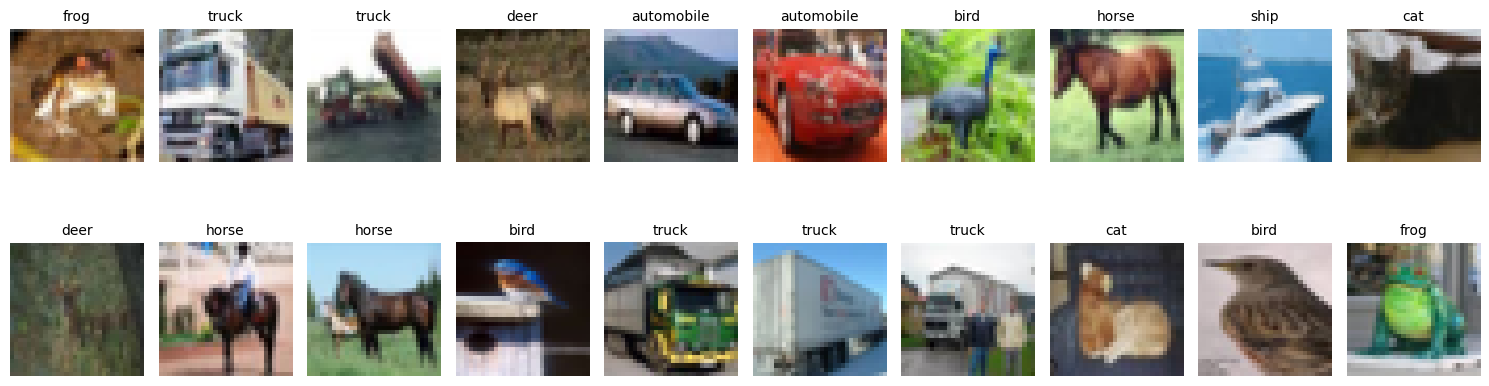

In [10]:
# Visualize Train Data
plt.figure(figsize=(15,5))
print("\n ")
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

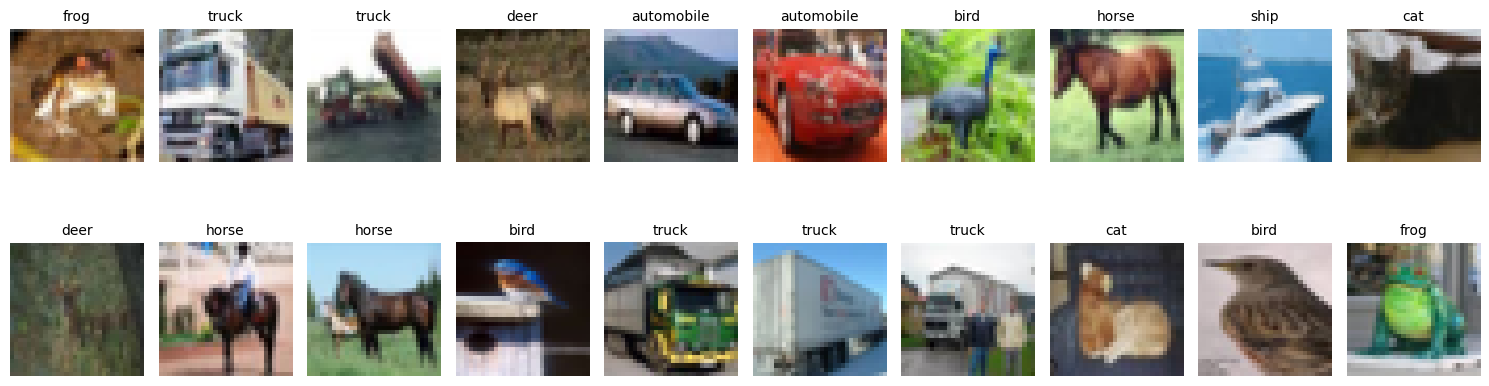

In [11]:
# Visualize Test Data
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [12]:
# Apply Normailization
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

## Deeper CNN Model

### Build Model

In [13]:
from keras.optimizers import Adam

model = Sequential([

    # Block 1
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3), name="conv1"),
    Conv2D(32, (3,3), padding='same', activation='relu', name="conv2"),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), padding='same', activation='relu', name="conv3"),
    Conv2D(64, (3,3), padding='same', activation='relu', name="conv4"),
    MaxPooling2D((2,2)),
    Dropout(0.30),

    # Block 3
    Conv2D(128, (3,3), padding='same', activation='relu', name="conv5"),
    Conv2D(128, (3,3), padding='same', activation='relu', name="conv6"),
    MaxPooling2D((2,2)),
    Dropout(0.40),

    # Block 4
    Conv2D(256, (3,3), padding='same', activation='relu', name="conv7"),
    Conv2D(256, (3,3), padding='same', activation='relu', name="conv8"),
    MaxPooling2D((2,2)),
    Dropout(0.40),

    # Classifier
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', name="dense256"),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv7 (Conv2D)                  │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv8 (Conv2D)                  │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense256 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,618 (4.73 MB)

 Trainable params: 1,240,618 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
deep_model_results = []
deep_experiment = 0

def deep_cnn(model_name, f1=32, f2=64, f3=128, f4=256, dense_units=256, batch_size=32, epochs=50, lr=0.001, normalise=1):

    global deep_experiment
    deep_experiment += 1

    preprocess_config = {"N": normalise}

    # Model
    model = Sequential([

        # Block 1
        Conv2D(f1, (3,3), padding='same', activation='relu', input_shape=(32,32,3), name="conv1"),
        Conv2D(f1, (3,3), padding='same', activation='relu', name="conv2"),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        # Block 2
        Conv2D(f2, (3,3), padding='same', activation='relu', name="conv3"),
        Conv2D(f2, (3,3), padding='same', activation='relu', name="conv4"),
        MaxPooling2D((2,2)),
        Dropout(0.30),

        # Block 3
        Conv2D(f3, (3,3), padding='same', activation='relu', name="conv5"),
        Conv2D(f3, (3,3), padding='same', activation='relu', name="conv6"),
        MaxPooling2D((2,2)),
        Dropout(0.40),

        # Block 4
        Conv2D(f4, (3,3), padding='same', activation='relu', name="conv7"),
        Conv2D(f4, (3,3), padding='same', activation='relu', name="conv8"),
        MaxPooling2D((2,2)),
        Dropout(0.40),

        # Classifier
        GlobalAveragePooling2D(),
        Dense(256, activation='relu', name="dense256"),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile Model
    optimizer = Adam(learning_rate=lr)
    initial_lr = lr
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"\nRunning Deep CNN Experiment {deep_experiment}")
    print(f"Filters: {f1}-{f2}-{f3}-{f4} | D={dense_units} | LR={lr}")
    print(f"\nRunning experiment: {deep_experiment} "
        f"Modal name: {model_name} | F1={f1}, F2={f2}, F3={f3}, F4={f4}, D={dense_units}, BS={batch_size}, Ephs={epochs}, LR= {lr}")

    # Training
    history1 = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=get_callbacks(),
        verbose=1
    )

    final_lr = float(model.optimizer.learning_rate.numpy())

    # Evaluation
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Best Epoch
    best_idx = np.argmax(history1.history['val_accuracy'])
    best_epoch = best_idx + 1


    # Experiment Title
    exp_title = (f"Expt: {deep_experiment} | {f1}-{f2}-{f3}-{f4} | D={dense_units} | LR={initial_lr:.4f}->{final_lr:.5f}")

    print("\nLearning Curves")
    plotter= Plot(history=history1, title=exp_title)
    plotter.plot_curve()

    print("\nConfusion Matrix")
    plotter.heatmap(y_test, y_pred, class_names)

    print("\nClassification Report")
    print(classification_report(y_test, y_pred, target_names=class_names))
    print("=========================")
    print("\n")

    # Store Results
    deep_model_results.append({

        "Experiment": deep_experiment,
        "model_name": model_name,
        "filters_block1": f1,
        "filters_block2": f2,
        "filters_block3": f3,
        "filters_block4": f4,
        "dense_units": dense_units,
        "batch_size": batch_size,
        "epochs_planned": epochs,
        "epochs_trained": len(history1.history['loss']),
        "best_epoch": best_epoch,
        "initial_learning_rate": initial_lr,
        "final_learning_rate": final_lr,
        "lr_reduced": final_lr < initial_lr,
        "total_params": model.count_params(),
        "best_train_acc": history1.history['accuracy'][best_idx],
        "best_val_acc": history1.history['val_accuracy'][best_idx],
        "overfit_gap_best": history1.history['accuracy'][best_idx] - history1.history['val_accuracy'][best_idx],
        "test_acc": test_acc,
        "test_loss": test_loss
    })
    return model, history1



Running Deep CNN Experiment 1
Filters: 32-64-128-256 | D=256 | LR=0.001

Running experiment: 1 Modal name: deep_baseline | F1=32, F2=64, F3=128, F4=256, D=256, BS=32, Ephs=50, LR= 0.001
Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.1958 - loss: 2.0951 - val_accuracy: 0.4123 - val_loss: 1.5545 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4102 - loss: 1.5663 - val_accuracy: 0.5087 - val_loss: 1.3474 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4953 - loss: 1.3816 - val_accuracy: 0.5461 - val_loss: 1.2665 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5537 - loss: 1.2441 - val_accuracy: 0.5991 - val_loss: 1.0997 - learning_rate: 0.0010
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5857 - loss: 1.1651 - val_accuracy: 0.6180 - val_loss: 1.0698 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 

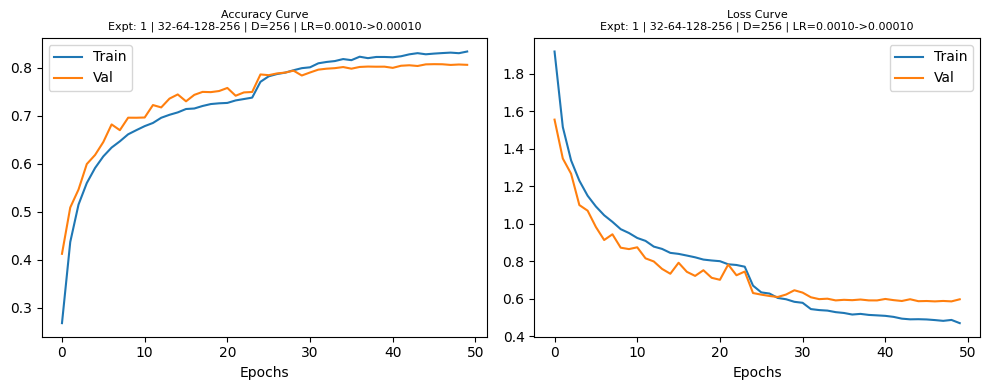


Confusion Matrix


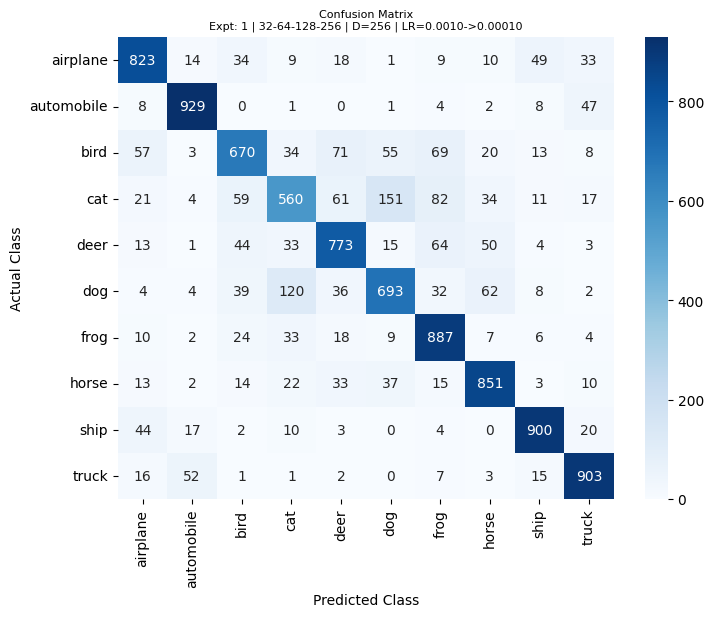


Classification Report
              precision    recall  f1-score   support

    airplane       0.82      0.82      0.82      1000
  automobile       0.90      0.93      0.92      1000
        bird       0.76      0.67      0.71      1000
         cat       0.68      0.56      0.61      1000
        deer       0.76      0.77      0.77      1000
         dog       0.72      0.69      0.71      1000
        frog       0.76      0.89      0.82      1000
       horse       0.82      0.85      0.83      1000
        ship       0.88      0.90      0.89      1000
       truck       0.86      0.90      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000





(<Sequential name=sequential_2, built=True>,
 <keras.src.callbacks.history.History at 0x7dedac9142f0>)

In [17]:
print("=========================")
deep_cnn(model_name="deep_baseline", f1=32, f2=64, f3=128, f4=256, dense_units=256, batch_size=32, epochs=50, lr=0.001, normalise=1)


Running Deep CNN Experiment 2
Filters: 64-128-256-512 | D=256 | LR=0.001

Running experiment: 2 Modal name: deep_wider | F1=64, F2=128, F3=256, F4=512, D=256, BS=32, Ephs=50, LR= 0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.1007 - loss: 2.3031 - val_accuracy: 0.0980 - val_loss: 2.3029 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.0996 - loss: 2.3028 - val_accuracy: 0.0980 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 5/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0994 - loss: 2.3027
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy

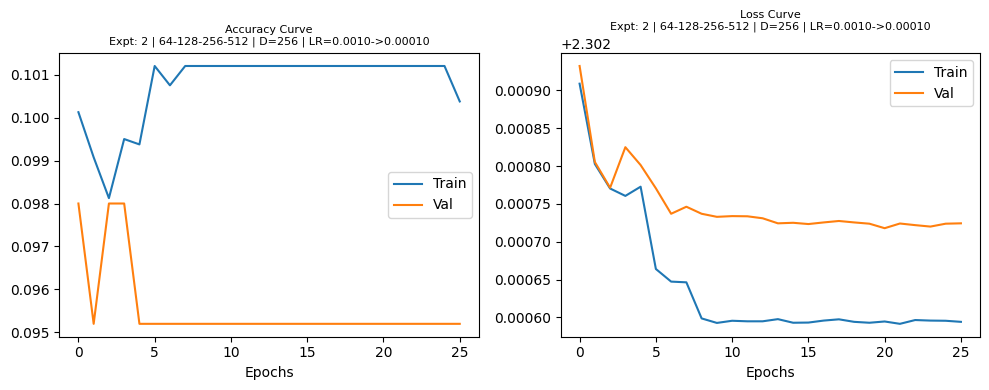


Confusion Matrix


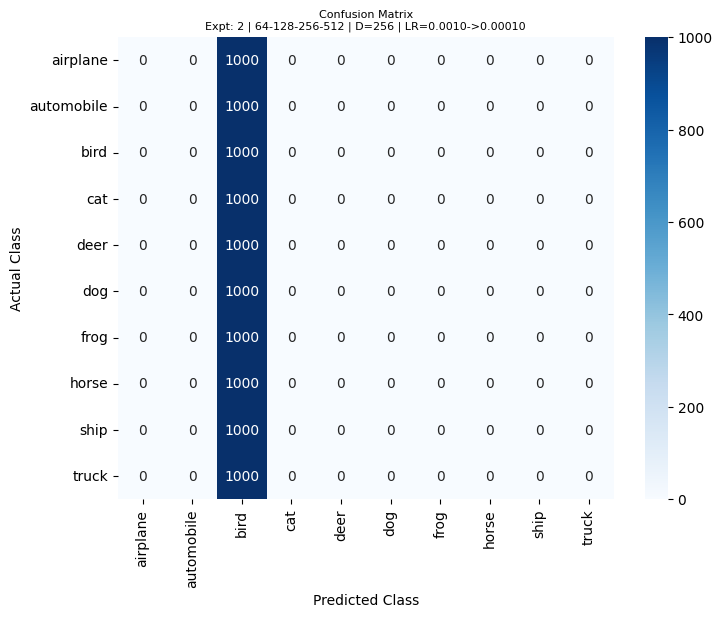


Classification Report
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.10      1.00      0.18      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000





/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(<Sequential name=sequential_3, built=True>,
 <keras.src.callbacks.history.History at 0x7ded7fa9c6b0>)

In [18]:
print("=========================")
deep_cnn(model_name="deep_wider", f1=64, f2=128, f3=256, f4=512, dense_units=256,batch_size=32, epochs=50, lr=0.001, normalise=1)


Running Deep CNN Experiment 4
Filters: 16-32-64-128 | D=128 | LR=0.001

Running experiment: 4 Modal name: deep_small | F1=16, F2=32, F3=64, F4=128, D=128, BS=32, Ephs=70, LR= 0.001
Epoch 1/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.1013 - loss: 2.3028 - val_accuracy: 0.0980 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 2/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3030 - learning_rate: 0.0010
Epoch 3/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0957 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3030 - learning_rate: 0.0010
Epoch 4/70
1238/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0999 - loss: 2.3027
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 5/70
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms

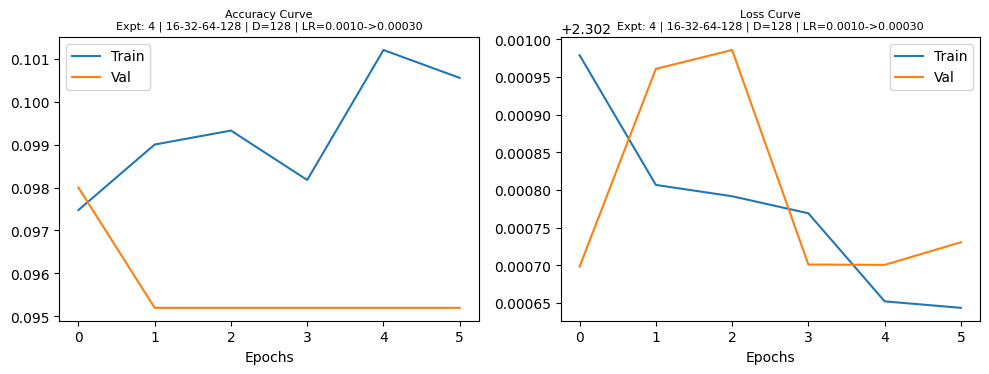


Confusion Matrix


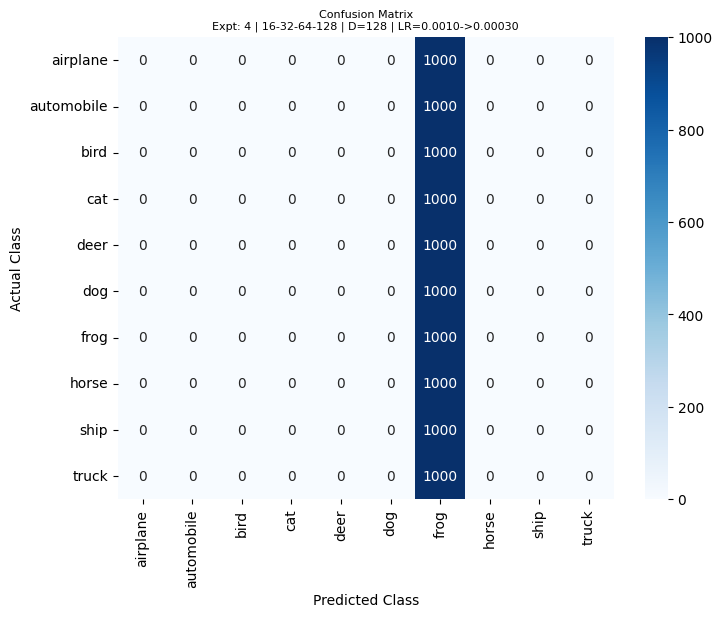


Classification Report
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.10      1.00      0.18      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000





/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(<Sequential name=sequential_5, built=True>,
 <keras.src.callbacks.history.History at 0x7dedac8f42f0>)

In [20]:
print("=========================")
deep_cnn(model_name="deep_small", f1=16, f2=32, f3=64, f4=128, dense_units=128, batch_size=32,epochs=70, lr=0.001, normalise=1)


Running Deep CNN Experiment 6
Filters: 32-64-128-256 | D=256 | LR=0.0005

Running experiment: 6 Modal name: deep_low_lr | F1=32, F2=64, F3=128, F4=256, D=256, BS=32, Ephs=80, LR= 0.0005
Epoch 1/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.2040 - loss: 2.0432 - val_accuracy: 0.3949 - val_loss: 1.6129 - learning_rate: 5.0000e-04
Epoch 2/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4384 - loss: 1.5038 - val_accuracy: 0.5104 - val_loss: 1.3379 - learning_rate: 5.0000e-04
Epoch 3/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5409 - loss: 1.2648 - val_accuracy: 0.5976 - val_loss: 1.1287 - learning_rate: 5.0000e-04
Epoch 4/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6027 - loss: 1.1196 - val_accuracy: 0.6712 - val_loss: 0.9270 - learning_rate: 5.0000e-04
Epoch 5/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6416 - loss: 1.0037 - val_accuracy: 0.6711 - val_loss: 0.9443 - learning_rate: 5.0000e-04
Epoch 6/80
1250/1250 ━

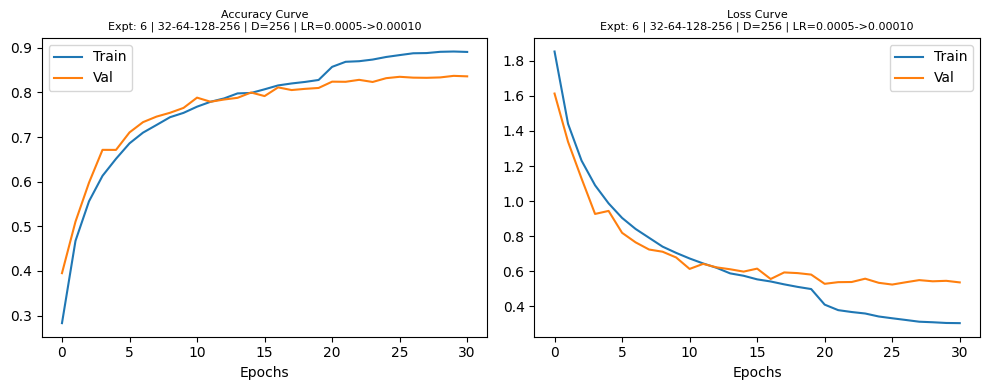


Confusion Matrix


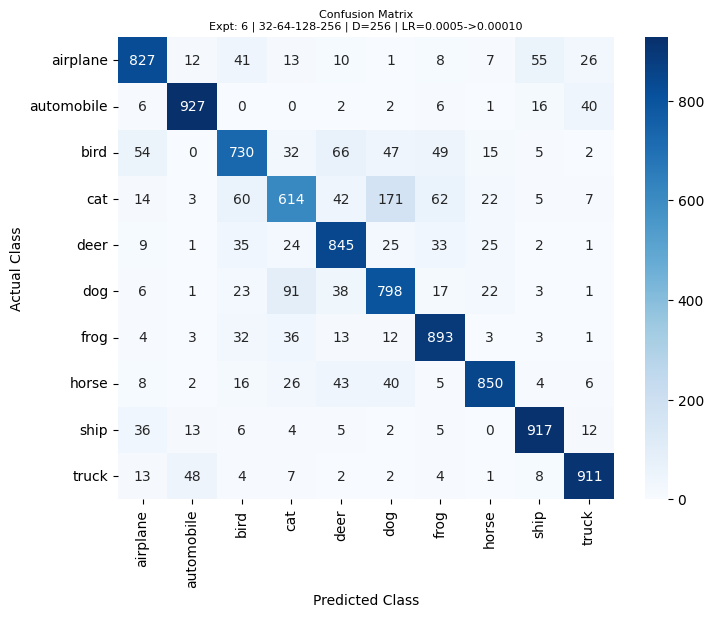


Classification Report
              precision    recall  f1-score   support

    airplane       0.85      0.83      0.84      1000
  automobile       0.92      0.93      0.92      1000
        bird       0.77      0.73      0.75      1000
         cat       0.72      0.61      0.66      1000
        deer       0.79      0.84      0.82      1000
         dog       0.73      0.80      0.76      1000
        frog       0.83      0.89      0.86      1000
       horse       0.90      0.85      0.87      1000
        ship       0.90      0.92      0.91      1000
       truck       0.90      0.91      0.91      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000





(<Sequential name=sequential_7, built=True>,
 <keras.src.callbacks.history.History at 0x7ded7f78b290>)

In [22]:
print("=========================")
deep_cnn(model_name="deep_low_lr", f1=32, f2=64, f3=128, f4=256, dense_units=256, batch_size=32, epochs=80, lr=0.0005, normalise=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Running Deep CNN Experiment 7
Filters: 32-64-128-256 | D=256 | LR=0.0005

Running experiment: 7 Modal name: deep_baseline_lr | F1=32, F2=64, F3=128, F4=256, D=256, BS=32, Ephs=80, LR= 0.0005
Epoch 1/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.1987 - loss: 2.0730 - val_accuracy: 0.4378 - val_loss: 1.5048 - learning_rate: 5.0000e-04
Epoch 2/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4445 - loss: 1.4964 - val_accuracy: 0.5380 - val_loss: 1.2865 - learning_rate: 5.0000e-04
Epoch 3/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5443 - loss: 1.2619 - val_accuracy: 0.6087 - val_loss: 1.0882 - learning_rate: 5.0000e-04
Epoch 4/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6137 - loss: 1.0994 - val_accuracy: 0.6673 - val_loss: 0.9235 - learning_rate: 5.0000e-04
Epoch 5/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6547 - loss: 0.9781 - val_accuracy: 0.6840 - val_loss: 0.8981 - learning_rate: 5.0000e-04
Epoch 6/80
1250/1

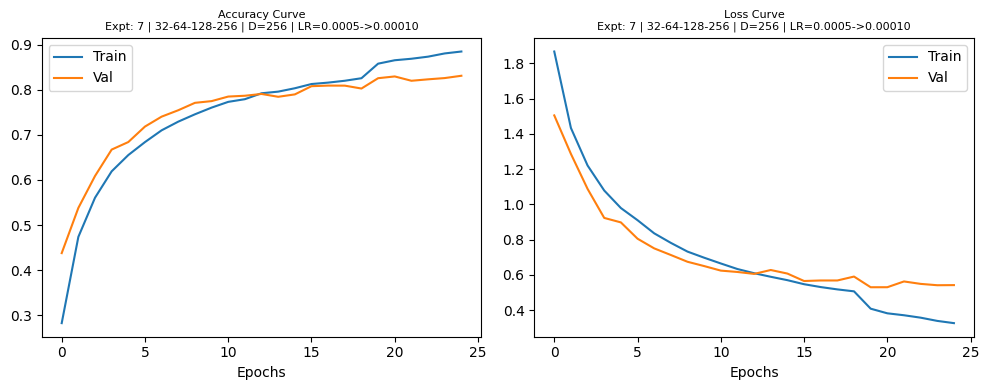


Confusion Matrix


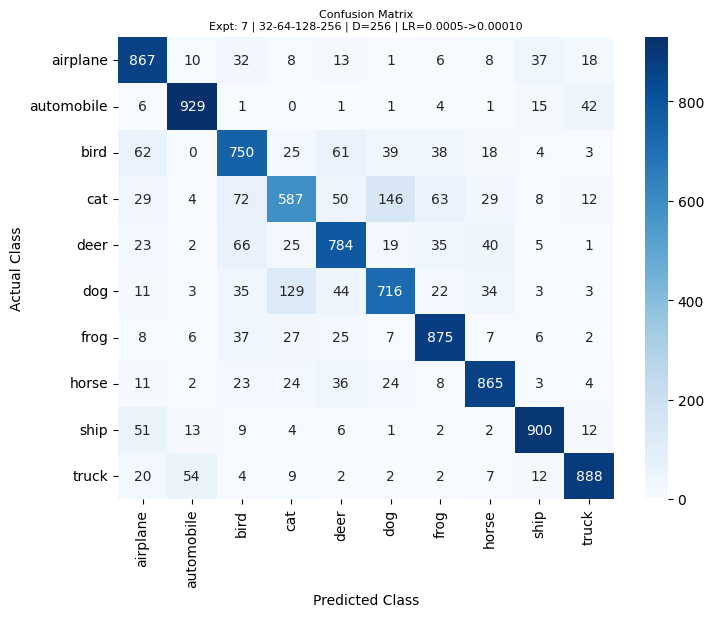


Classification Report
              precision    recall  f1-score   support

    airplane       0.80      0.87      0.83      1000
  automobile       0.91      0.93      0.92      1000
        bird       0.73      0.75      0.74      1000
         cat       0.70      0.59      0.64      1000
        deer       0.77      0.78      0.78      1000
         dog       0.75      0.72      0.73      1000
        frog       0.83      0.88      0.85      1000
       horse       0.86      0.86      0.86      1000
        ship       0.91      0.90      0.90      1000
       truck       0.90      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.81      0.82      0.81     10000
weighted avg       0.81      0.82      0.81     10000





(<Sequential name=sequential_8, built=True>,
 <keras.src.callbacks.history.History at 0x7dec7c4c46b0>)

In [24]:
deep_cnn(model_name="deep_baseline_lr", f1=32, f2=64, f3=128, f4=256, dense_units=256, batch_size=32, epochs=80, lr=0.0005, normalise=1)

In [25]:
deep_results_df = pd.DataFrame(deep_model_results)

deep_results_df.round(4)

,Experiment,model_name,filters_block1,filters_block2,filters_block3,filters_block4,dense_units,batch_size,epochs_planned,epochs_trained,best_epoch,initial_learning_rate,final_learning_rate,lr_reduced,total_params,best_train_acc,best_val_acc,overfit_gap_best,test_acc,test_loss
0,1,deep_baseline,32,64,128,256,256,32,50,50,46,0.0010,0.0001,True,1240618,0.8290,0.8070,0.0220,0.7989,0.6177
1,2,deep_wider,64,128,256,512,256,32,50,26,1,0.0010,0.0001,True,4819274,0.1001,0.0980,0.0021,0.1000,2.3026
2,4,deep_small,16,32,64,128,128,32,70,6,1,0.0010,0.0003,True,329114,0.0975,0.0980,-0.0005,0.1000,2.3027
3,6,deep_low_lr,32,64,128,256,256,32,80,31,30,0.0005,0.0001,True,1240618,0.8916,0.8370,0.0545,0.8312,0.5506
4,7,deep_baseline_lr,32,64,128,256,256,32,80,25,25,0.0005,0.0001,True,1240618,0.8846,0.8309,0.0537,0.8161,0.5642


In [26]:
from google.colab import files
deep_results_df.to_csv("deep_cnn_experiment_results.csv", index=False)
files.download("deep_cnn_experiment_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>